In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x = df.iloc[:,3:]

In [6]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


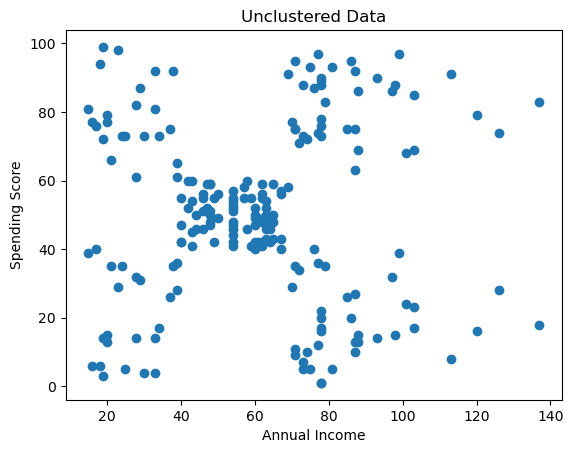

In [7]:
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering


In [11]:
km = KMeans(n_clusters=3)


In [13]:
x.shape

(200, 2)

In [12]:
km.fit_predict(x)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [14]:
#SSE (sum squared error)
km.inertia_

106348.37306211119

In [15]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [16]:
sse

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 24990.4343103969,
 21818.114588452183,
 19657.783608703958,
 17515.872164701657,
 16390.74460606034,
 14852.531983113506,
 12816.898555873559,
 11696.656262597051]

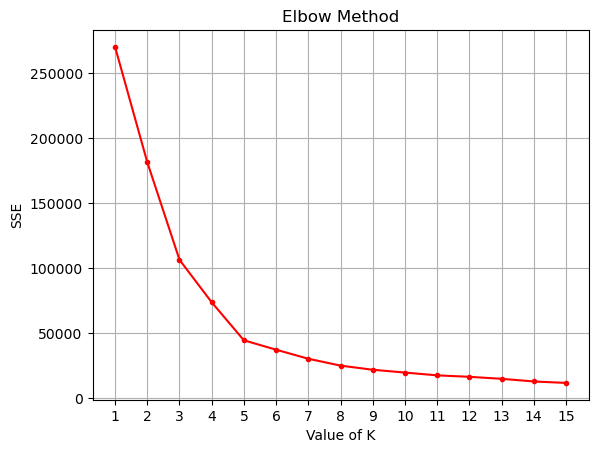

In [17]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color='red')

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silh = []
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x,labels)
    silh.append(score)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [20]:
silh

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5288104473798049,
 0.45632595452408425,
 0.46148389463592215,
 0.449795408266166,
 0.4265157234623257,
 0.4390976964254172,
 0.4275746781015908,
 0.42171806687463326,
 0.4170102425024387]

<BarContainer object of 14 artists>

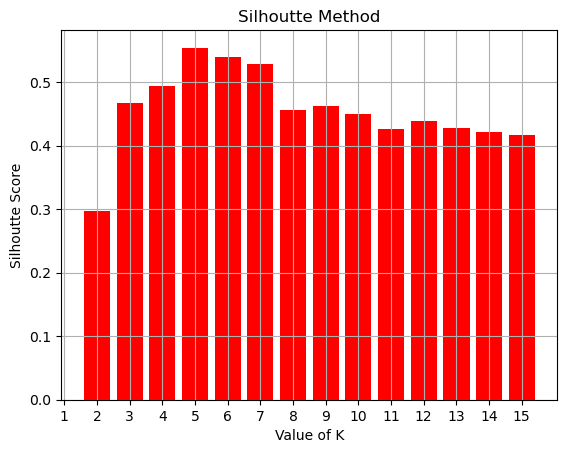

In [21]:
plt.title('Silhoutte Method')
plt.xlabel('Value of K')
plt.ylabel('Silhoutte Score')
plt.grid()
plt.xticks(range(1,16))
plt.bar(range(2,16),silh,color='red')

In [25]:
km = KMeans(n_clusters=5,random_state=0)

In [23]:
labels = km.fit_predict(x)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

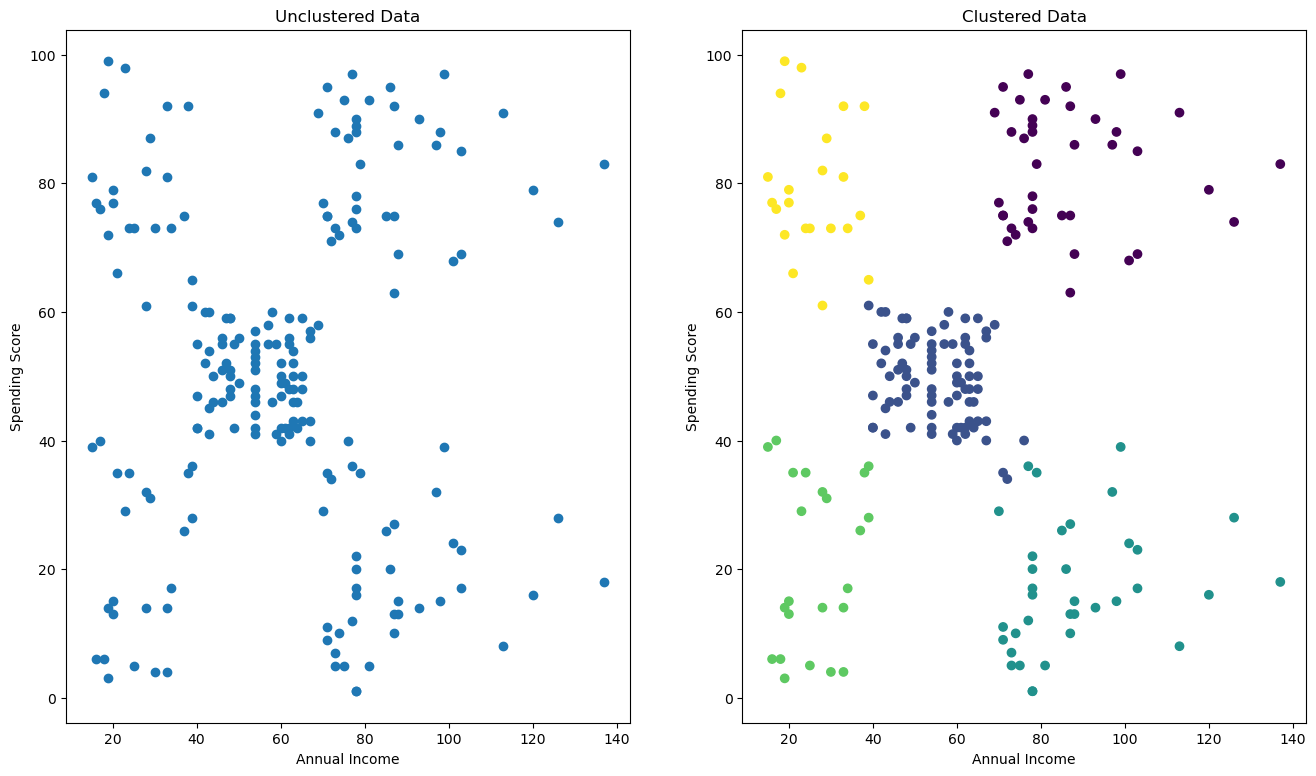

In [27]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)

In [31]:
df[labels==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98
